In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('haberman.csv')
print(df)

"""In the given dataset, we don't have columns names specified. 
    Inorder to have a clear understanding of data, we shall add the columns for the dataset.
    Though, we can rename the first data points of all the columns to the column name,
    we are not performing because we might lose the values of the first patient. 
    As the data of every patient is important, we don't risk of ignoring"""


     age  year_of_operation  auxillary_nodes  survival_status
0     30                 64                1                1
1     30                 62                3                1
2     30                 65                0                1
3     31                 59                2                1
4     31                 65                4                1
..   ...                ...              ...              ...
301   75                 62                1                1
302   76                 67                0                1
303   77                 65                3                1
304   78                 65                1                2
305   83                 58                2                2

[306 rows x 4 columns]


"In the given dataset, we don't have columns names specified. \n    Inorder to have a clear understanding of data, we shall add the columns for the dataset.\n    Though, we can rename the first data points of all the columns to the column name,\n    we are not performing because we might lose the values of the first patient. \n    As the data of every patient is important, we don't risk of ignoring"

In [3]:
df #We get the data set with column names specified

,age,year_of_operation,auxillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
#High-Level Statistics

df.shape

(306, 4)

* The result says that there are 4 attributes & 306 datapoints from 306 patients

In [5]:
df.columns
# Results the names of columns

Index(['age', 'year_of_operation', 'auxillary_nodes', 'survival_status'], dtype='object')

In [6]:
df['survival_status'].value_counts()  

1    225
2     81
Name: survival_status, dtype: int64

#### The result says that there are 225 patients who survived for 5 or more years after operation &
#### 81 patients died within 5 years

### PDF

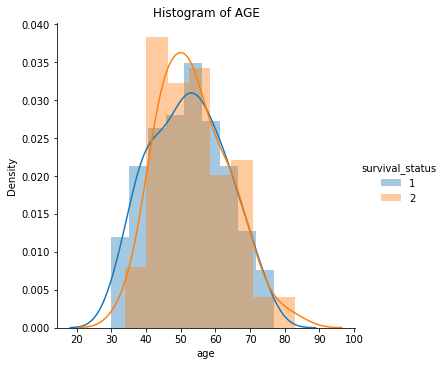

In [10]:
#UNIVARIATE ANALYSIS

#In Univariate analysis, we use only one feature & exrtact insights

#P.D.F

#P.D.F for AGE

sns.FacetGrid(df,hue='survival_status',size=5)\
   .map(sns.distplot,'age')\
   .add_legend()
plt.title("Histogram of AGE")
plt.ylabel("Density")
plt.show()


* We observe that:-

* If age is more than 80, then people will die within 5 years.
* Highest number of died patients went through surgery at the age of 40.
* Highest number of survived patients went through surgery at the age of 57.

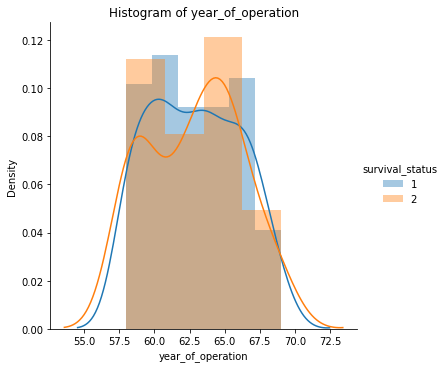

In [11]:
# P.D.F for the attribute year_of_operation

sns.FacetGrid(df,hue='survival_status',size=5)\
   .map(sns.distplot,'year_of_operation')\
   .add_legend()
plt.title("Histogram of year_of_operation")
plt.ylabel("Density")
plt.show()


We observe that:
* The 2 PDF curves have a significant overlap among them. IT is difficult to draw insights from this

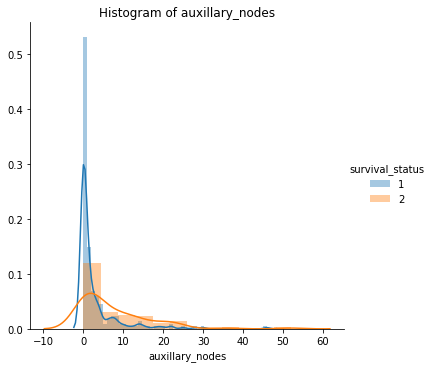

In [13]:
# P.D.F for the attribute auxillary_nodes

sns.FacetGrid(df,hue='survival_status',size=5)\
   .map(sns.distplot,'auxillary_nodes')\
   .add_legend()
plt.title("Histogram of auxillary_nodes")
plt.show()

We observe that:
* The lower the number of auxillary nodes, higher the chances of surviving more than 5 years
* More than 50% of the survied patients had <= 5 nodes

### CDF

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


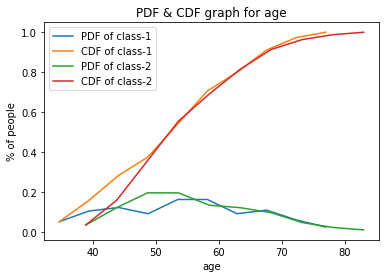

In [14]:
# C.D.F for the attribute age

one = df.loc[df["survival_status"] == 1]
two = df.loc[df["survival_status"] == 2]
label = ["PDF of class-1", "CDF of class-1", "PDF of class-2", "CDF of class-2"]

counts, bin_edges = np.histogram(one["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("PDF & CDF graph for age")
plt.xlabel("age")
plt.ylabel("% of people")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts,bin_edges = np.histogram(two['age'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)

plt.show()

We observe that:
* 80% of the people who went through surgery are below 60 years of age

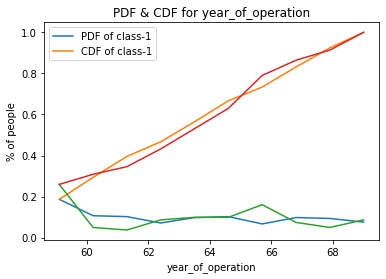

In [15]:

# CDF for year_of_operation

label = ["PDF of class-1", "CDF of class-1", "PDF of class-2", "CDF of class-2"]
counts, bin_edges = np.histogram(one["year_of_operation"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two['year_of_operation'],bins=10,density=True)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.title("PDF & CDF for year_of_operation")
plt.xlabel("year_of_operation")
plt.ylabel("% of people")
plt.legend(label)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()



We observe that: 
* before 1960, about 20% of the people who went through surgery suvied less than 5 years

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


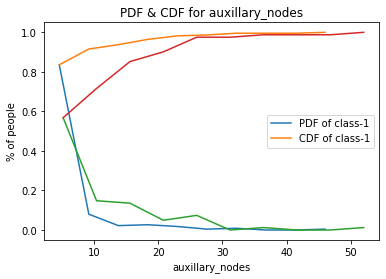

In [16]:
# CDF for auxillary nodes

label = ["PDF of class-1", "CDF of class-1", "PDF of class-2", "CDF of class-2"]
counts, bin_edges = np.histogram(one["auxillary_nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(two["auxillary_nodes"],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.title("PDF & CDF for auxillary_nodes")
plt.xlabel("auxillary_nodes")
plt.ylabel("% of people")
plt.legend(label)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

We observe that:
* 80% of the survived people have less than 10 auxillary nodes

### Box Plot

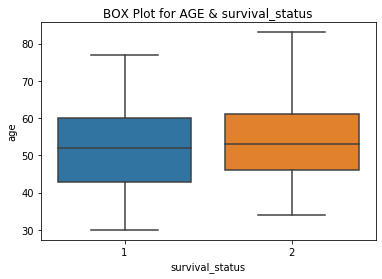

In [17]:
# BOX PLOT for AGE

sns.boxplot(x='survival_status', y='age', data= df)
plt.title("BOX Plot for AGE & survival_status")
plt.show()

We observe that:
* The median for both the survivors & died people is approximately similar

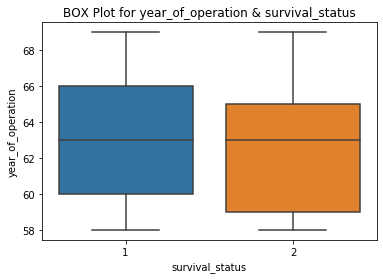

In [18]:
# BOX PLOT for year_of_operation

sns.boxplot(x='survival_status', y='year_of_operation', data= df)
plt.title("BOX Plot for year_of_operation & survival_status")
plt.show()

We observe that:
* In the class 2, where people couldn't survive more than 5 years, majority of them have gone through surgery before 1963

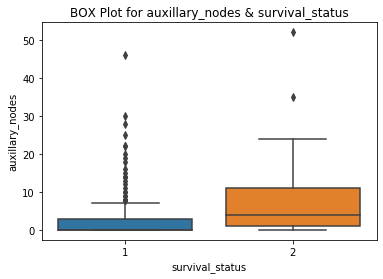

In [19]:
# BOX PLOT for auxillary_nodes

sns.boxplot(x='survival_status', y='auxillary_nodes', data= df)
plt.title("BOX Plot for auxillary_nodes & survival_status")
plt.show()

### Violin Plot

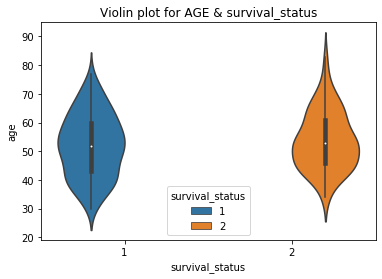

In [20]:
#VIOLIN PLOT for survival status & AGE

sns.violinplot(x='survival_status',y='age',hue='survival_status',data=df)
plt.title("Violin plot for AGE & survival_status")
plt.show()

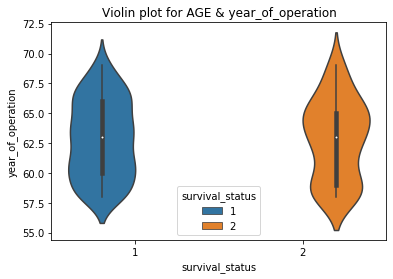

In [21]:
#VIOLIN PLOT for survival status & year_of_operation

sns.violinplot(x='survival_status',y='year_of_operation',hue='survival_status',data=df)
plt.title("Violin plot for AGE & year_of_operation")
plt.show()

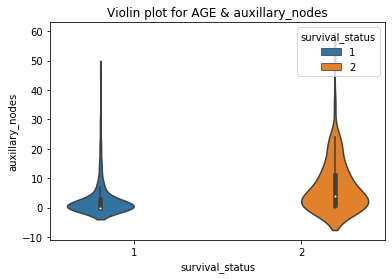

In [22]:
#VIOLIN PLOT for survival status & auxillary_nodes

sns.violinplot(x='survival_status',y='auxillary_nodes',hue='survival_status',data=df)
plt.title("Violin plot for AGE & auxillary_nodes")
plt.show()

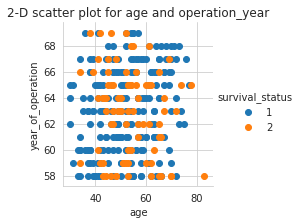

In [23]:
# BI-VARIATE ANALYSIS

#SCATTER PLOTS

#2-D Scatter Plot for AGE & Year_of_operation

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status", size = 3).map(plt.scatter, "age", "year_of_operation").add_legend()
plt.title("2-D scatter plot for age and operation_year")
plt.show()

From this graph:
* It is difficult to predict the survival status based on the age & year of operation. 
* Majority of the data is overlapped.

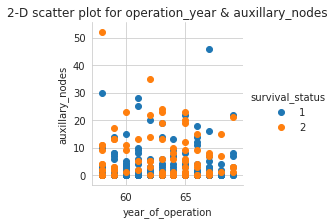

In [24]:
#2-D Scatter Plot for year_of_operation & auxillary_nodes

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status", size = 3).map(plt.scatter, "year_of_operation","auxillary_nodes").add_legend()
plt.title("2-D scatter plot for operation_year & auxillary_nodes")
plt.show()

From this graph:
* It is difficult to predict the survival status based on the operation_year & auxillary_nodes. 
* Majority of the data is overlapped.

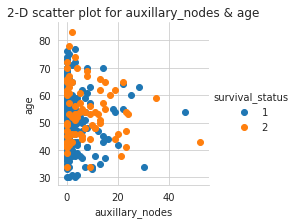

In [25]:
#2-D Scatter Plot for auxillary_nodes & age

sns.set_style("whitegrid")
sns.FacetGrid(df, hue = "survival_status", size = 3).map(plt.scatter, "auxillary_nodes","age").add_legend()
plt.title("2-D scatter plot for auxillary_nodes & age")
plt.show()

From this graph:
* It is difficult to predict the survival status based on the auxillary_nodes & age. 
* Majority of the data is overlapped.

### PAIR-PLOT

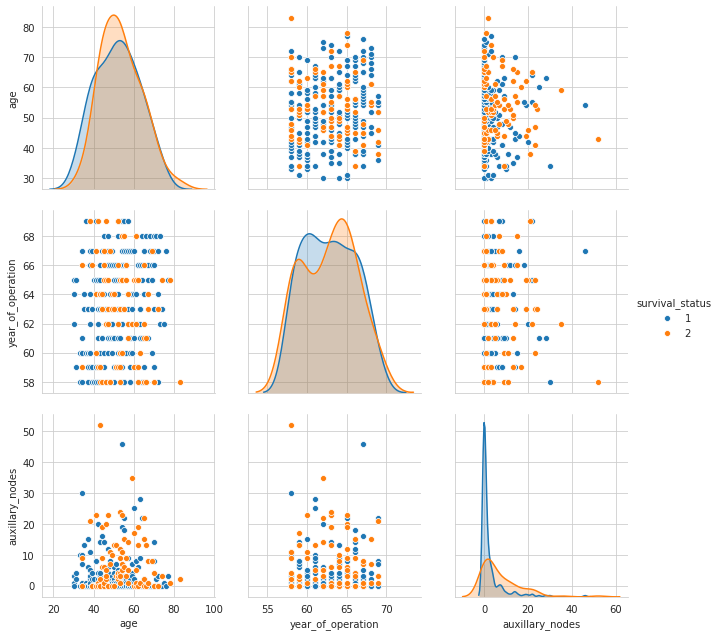

In [26]:
sns.set_style("whitegrid")
sns.pairplot(df,hue='survival_status',vars = ['age', 'year_of_operation', 'auxillary_nodes'],size=3)
plt.show()


We observe that:
* Due to too much overlapping of data, we are unable to classify which 
* variable is useful to extract insights from the plot.

### Conclusion

1. I feel that the haberman dataset is a highly imbalanced dataset as there is a huge variation in no of tuples in the survival_status column.
2. There is a lot of overlapping between the datapoints due to which it is diffcult to classify the data